In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
%%time
df = pd.read_csv("../data/new_df.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 34.5 s
Wall time: 34.6 s


In [18]:
df.dtypes

code                             int64
product_name                    object
main_category_en                 int64
product_quantity               float64
food_groups_en                   int64
                                ...   
phylloquinone_100g             float64
beta-glucan_100g               float64
inositol_100g                  float64
carnitine_100g                 float64
fruits-vegetables-rate_100g      int64
Length: 136, dtype: object

In [20]:
# Sélectionner les colonnes numériques
cols_to_convert_int = list(df.select_dtypes(include=["int64"]).columns)
cols_to_convert_float = list(df.select_dtypes(include=["int64"]).columns)

In [21]:
## Changing format of object and float64 columns

df[cols_to_convert_int] = df[cols_to_convert_int].astype('int32')
df[cols_to_convert_float] = df[cols_to_convert_float].astype('float32')

### Normalisation

In [22]:
# Sélectionner les colonnes numériques
numeric_cols = list(df.select_dtypes(include=["float32","int32"]).columns)

In [23]:
# Créer un scaler MinMax
scaler = MinMaxScaler()

In [24]:
# Appliquer la normalisation aux colonnes numériques
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Petite PCA

In [25]:
# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df[numeric_cols]), columns=['PCA1', 'PCA2'])

In [26]:
# Appliquer K-means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

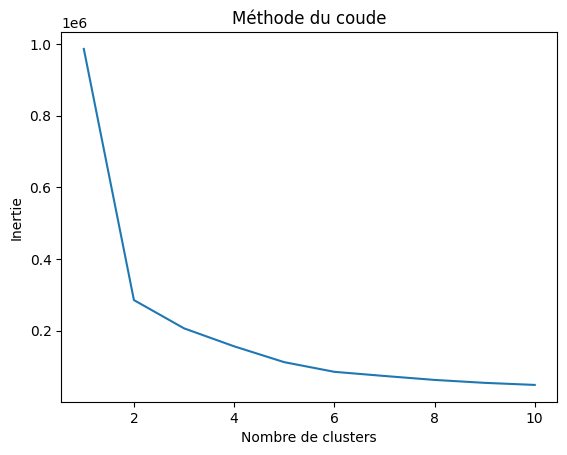

In [27]:
# Afficher le graphique de la méthode du coude
plt.plot(range(1, 11), inertia)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [28]:
# Sélectionner le nombre optimal de clusters
k = 3

## K-means

### Avec PCA

In [29]:
# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

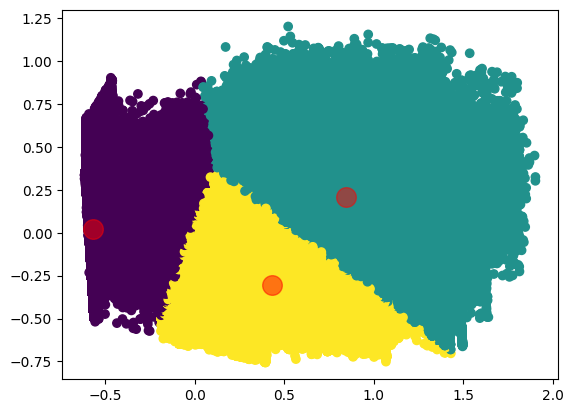

In [30]:
# Afficher les centres de cluster
centers = kmeans.cluster_centers_
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()


In [31]:
df['cluster_K_pca'] = kmeans.labels_

In [32]:
df.loc[:, ['product_name', 'cluster_K_pca']]

,product_name,cluster_K_pca
0,Andrè,0
1,Vitória crackers,0
2,Burger Meat Pollo,0
3,Hamburguesas de ternera 100%,0
4,Blueberry Cobbler Coffee,0
...,...,...
1833609,Instant feerique,2
1833610,DooWap,2
1833611,Doowap,2
1833612,Almond Butter,2


In [33]:
df.loc[df['cluster_K_pca'] == 0, ['product_name', 'cluster_K_pca']]

,product_name,cluster_K_pca
0,Andrè,0
1,Vitória crackers,0
2,Burger Meat Pollo,0
3,Hamburguesas de ternera 100%,0
4,Blueberry Cobbler Coffee,0
...,...,...
1833595,Minis beignets,0
1833596,TK Weizen-Brötchen,0
1833598,Scs,0
1833599,Fati,0


In [34]:
df.loc[df['cluster_K_pca'] == 1, ['product_name', 'cluster_K_pca']]

,product_name,cluster_K_pca
6,moutarde au moût de raisin,1
21,Salade de macedoine de légumes,1
37,Nectar d'abricot,1
41,BAguette bressan,1
58,Pur jus de pomme,1
...,...,...
1833600,Light & Free SKYR A BOIRE,1
1833603,2400g CAROTTES RONDELLES DAUCY CEE2,1
1833604,La vache qui rit extra crème,1
1833605,Brioche tressee nature,1


In [35]:
df.loc[df['cluster_K_pca'] == 2, ['product_name', 'cluster_K_pca']]

,product_name,cluster_K_pca
13,Tarte noix de coco,2
18,Compote de poire,2
38,cuisse de poulet direct au four curry,2
50,Rillettes de sanglier au Chouchen,2
106,Naturablue original,2
...,...,...
1833609,Instant feerique,2
1833610,DooWap,2
1833611,Doowap,2
1833612,Almond Butter,2


### Sans PCA

In [36]:
X = df[['main_category_en', 'product_quantity', 'food_groups_en', 'pnns_groups_1', 'pnns_groups_2', 'nova_group', 'countries_en', 'categories_en', 'packaging_en', 'ecoscore_grade', 'product_quantity.1', 'ecoscore_score', 'nova_group.1', 'nutriscore_score', 'nutriscore_grade', 'additives_n', 'serving_quantity', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'erythritol_100g', 'fiber_100g', 'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'added-salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g', 'fruits-vegetables-rate_100g']]

In [37]:
# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [38]:
df['cluster_K'] = kmeans.labels_

In [40]:
df.loc[df['cluster_K'] == 0, ['product_name', 'cluster_K_pca', 'cluster_K']]

,product_name,cluster_K_pca,cluster_K
1,Vitória crackers,0,0
3,Hamburguesas de ternera 100%,0,0
11,Chocolate n 3,0,0
12,&quot;Baguette Lyonnais&quot;,0,0
13,Tarte noix de coco,2,0
...,...,...,...
1833607,Mini tressée,2,0
1833610,DooWap,2,0
1833611,Doowap,2,0
1833612,Almond Butter,2,0


In [41]:
df.loc[df['cluster_K'] == 1, ['product_name', 'cluster_K_pca', 'cluster_K']]

,product_name,cluster_K_pca,cluster_K
0,Andrè,0,1
2,Burger Meat Pollo,0,1
4,Blueberry Cobbler Coffee,0,1
5,hyde icon,0,1
6,moutarde au moût de raisin,1,1
...,...,...,...
1833602,Garniture végétale à la provençale,2,1
1833603,2400g CAROTTES RONDELLES DAUCY CEE2,1,1
1833604,La vache qui rit extra crème,1,1
1833608,Puree De Courgettes Carottes Jaunes Boursin D'...,1,1


In [42]:
df.loc[df['cluster_K'] == 2, ['product_name', 'cluster_K_pca', 'cluster_K']]

,product_name,cluster_K_pca,cluster_K
13373,Musenmai calrose rice,2,2
40232,"Enriched medium grain white calrose rice, whit...",1,2
45467,"Broiler Chicken, 8 Pc cut up without neck and ...",2,2
51487,Premium Donut Frying Shortening,1,2
70878,Parboiled Brown Rice,0,2
...,...,...,...
1788642,Cider Apfel-Birne,1,2
1797207,Liddells lactose free full cream milk,1,2
1802118,Angkor Jasmine Rice,0,2
1805177,Macadamia Oil,0,2


## AgglomerativeClustering

In [44]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(pca_df)

MemoryError: Unable to allocate 12.2 TiB for an array with shape (1681069233691,) and data type float64

## DBSCAN

In [45]:
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_df)

MemoryError: 

In [ ]:
# Afficher les clusters
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=dbscan.labels_, cmap='viridis')
plt.show()